In [1]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.integrate import solve_ivp

# Numerical Solutions of Differential Equations

Although there is no explicity analytical solution for most differential equations, we can numerically solve differential equations to an arbitrary precision.

In the following we investigate and implement the most basic algorithm (*Euler method*) to numerically solve ordinary differential equations (ODEs). We also apply a more refined algorithm (*Runge-Kutta*).

## Euler Method

The idea behind the Euler method is to calculate the slope at the starting point using the differential equation. Taking a small step in the direction of the tangent line provides a good approximation for a next point on the (unknown) curve. The process is then repeated, leading to a series of points that approximate the real function. The error can be decreased by decreasing the step size.

For a differential equation $\dot{x}(t)=f(t, x(t))$ the algorithm is as follows:
- Find the slope at the starting point $x_0=x(t_0)$: $\dot{x}(t_0)=f(t_0, x_0)$
- Assuming the slope does not change over the time interval $\Delta t$, the step to the next point is as follows: <br/> $\dfrac{\Delta x}{\Delta t}\approx \dot{x}(t_0) \Longrightarrow \Delta x \approx \dot{x}(t_0)\cdot \Delta t = f(t_0, x_0)\cdot \Delta t$
- The next point is therefore $x_1 \approx x_0+\Delta x =x_0+f(t_0, x_0)\cdot \Delta t$
- The process is repetated. For the step $i\rightarrow i+1$ we find $x_{i+1}\approx x_i+f(t_i, x_i)\cdot \Delta t$

### Example

Let us consider the differential equation $\dot{x}(t)=-x(t)$. We know that the solution to this differential equation is given by $x(t)=x_0\cdot e^{-t}$, but we want to find a numerical solution and compare it with the exact solution.

The following code uses the Euler method to approximate the solution for the interval (0, 5). The number of steps ($N$) can be adjusted. The graph displays the numerical solution (red points) and the exact solution (dashed blue line). It is obvious that for a small number of points (i.e. a large time interval) the numerical calculation is only a poor approximation to the exact solution. Increasing the number of points leads to a much better agreement.

The problem in a case where the exact solution is not known is to find out what a sufficient number of points is. Increasing the number to extreme values does not just increase the calculation time, but it can also cause problems because of the limited precision of the computer-based calucations.

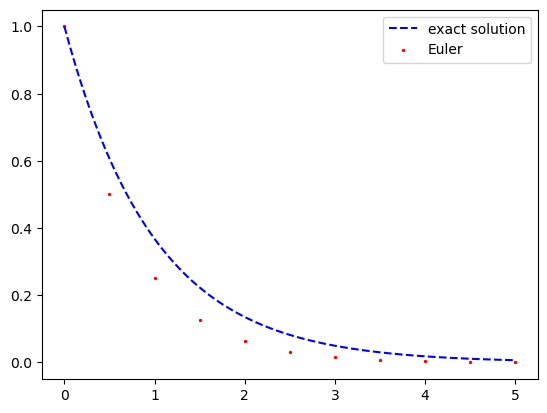

In [2]:
# define a function that returns the derivative at x
def dxdt(x):
    return -x

# define a function for the exact solution
def ex_sol(t, x0):
    return x0 * np.exp(-t)

N = 10 # number of steps for numerical calculation

tmax = 5 # upper limit of time range
dt = tmax/N # calcualte time interval

x0 = 1 # initial value
t = np.linspace(0, tmax, N+1) # array for times
x = np.zeros(N+1) # prepare empty array for positions

x[0] = x0 # set first element to initial value

N_ex = 100 # number of points to plot for exact solution
t_ex = np.linspace(0, tmax, N_ex) # times for exact solution
x_ex = ex_sol(t_ex, x0) # positions for exact solution

# Euler algorithm
for i in range(0, N-1):
    slope = dxdt(x[i]) # get value for slope of current point
    x[i+1] = x[i] + slope * dt # calculate position of next step

plt.plot(t_ex, x_ex, 'b--', label='exact solution')
plt.scatter(t, x, s=2, c='red', label='Euler')
plt.legend()
plt.show()

### Runge-Kutta Method

The Euler method is easy to understand and to implement, but it has its limitations. There are more advanced methods that are optimised for more accurate approximations. The tradeoff is that more advanced algorithms are more demanding with respect to computation time.

The Python package SciPy (Scientific Python) contains a method *solve_ivp* to solve initial value problems for ODEs. It allows to choose from six different algorithms, but the standard method (*explicit Runge-Kutta method of order 5(4)*) works perfectly fine for our problems. For further information about how this algorithm works, see for example https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods.

In the graph below the numerical solution provided by the Runge-Kutta method has been added (black dots). As can be seen, even with a small number of points this algorithm is an excellent approximation for the exact solution. The lower diagram shows the relative deviation to the exact solution. The solution calculated with the Euler method can be added to the graph using the checkbox.

The quality of the numerical solution found with *solve_ivp* is not affected by the number of points used for the evaluation. To further improve the accuracy, the following parameters can be set:
- rtol: set relative tolerance (default value 1e-3)
- atol: set absolute tolerance (default value 1e-6)

In the graph below the effect of rtol can be visually investigated.

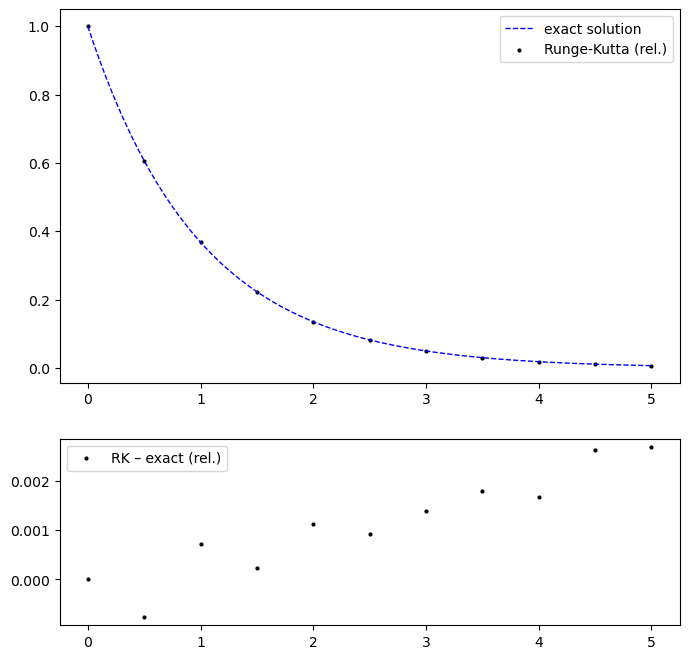

In [5]:
# define a function that returns the derivative at x (RK requires to have the time as an argument)
def dxdt(t, x):
    return -x

# define a function for the exact solution
def ex_sol(t, x0):
    return x0 * np.exp(-t)

N = 10 # number of steps
rtol = 1e-3 # relative tolerance for Runge-Kutta algorithm
Euler = False # include solution with Euler algorithm?

tmax = 5 # upper limit of time range
dt = tmax/N # calcualte time interval

x0 = 1 # initial value
t = np.linspace(0, tmax, N+1) # array for times
x_eu = np.zeros(N+1) # prepare empty array for positions

x_eu[0] = x0 # set first element to initial value

N_ex = 100 # number of points to plot for exact solution
t_ex = np.linspace(0, tmax, N_ex) # times for exact solution
x_ex = ex_sol(t_ex, x0) # positions for exact solution
x_ex2 = ex_sol(t, x0) # positions at times for numerical solution (for comparison)

# Euler algorithm
for i in range(0, N):
    slope = dxdt(0, x_eu[i]) # get value for slope of current point
    x_eu[i+1] = x_eu[i] + slope * dt # calculate position of next step

# Runge-Kutta algorithm
rk = solve_ivp(dxdt, (0, tmax), [x0], rtol=float(rtol), t_eval=t) # call solve_ivp to get solution with RK
x_rk = rk.y # assign positions (rk.t contains times, rk.y positions)

# prepare stacked plot
fig, axs = plt.subplots(2, figsize=(8, 8), gridspec_kw={'height_ratios': [2, 1]})
ax1, ax2 = axs

ax1.plot(t_ex, x_ex, 'b--', linewidth=1, label='exact solution')
if Euler:
    ax1.scatter(t, x_eu, s=4, c='red', label='Euler')
ax1.scatter(t, x_rk, s=4, c='black', label="Runge-Kutta (rel.)")
ax1.legend()

if Euler:
    ax2.scatter(t, (x_eu-x_ex2)/x_ex2, s=4, c='red', label='Euler – exact')
ax2.scatter(t, (x_rk-x_ex2)/x_ex2, s=4, c='black', label='RK – exact (rel.)')
ax2.legend()
plt.show()

### Parameters

In more realistic (i.e. physical) differential equations there will be additional parameters that have to be used while calculating the solution.

As an example we introduce a decay parameter $\lambda$ into the differential equation from above:

$$\dot x(t)=-\lambda x(t)$$

In the code below the value for lambda can be varied. The current value is passed on to *solve_ivp* via the keyword argument *args*.

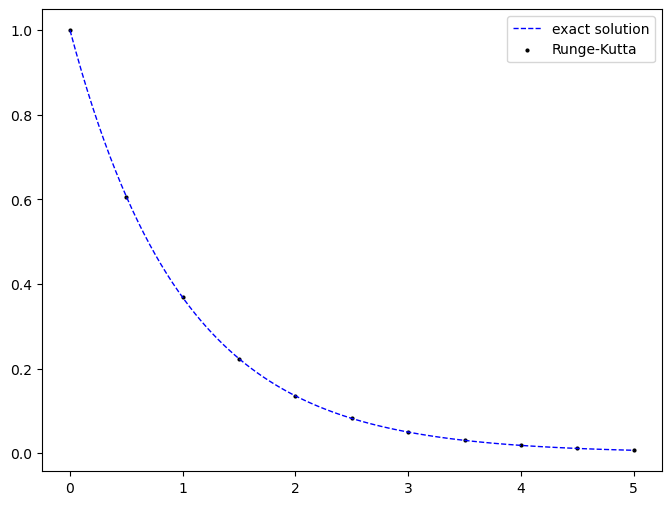

In [6]:
# define a function that returns the derivative at x (RK requires to have the time as an argument)
def dxdt(t, x, lam):
    return -lam * x

# define a function for the exact solution
def ex_sol(t, x0, lam):
    return x0 * np.exp(-lam * t)


lam = 1.0 # value for lambda
N = 10 # number of steps

tmax = 5 # upper limit of time range
dt = tmax/N # calcualte time interval

x0 = 1 # initial value
t = np.linspace(0, tmax, N+1) # array for times

N_ex = 100 # number of points to plot for exact solution
t_ex = np.linspace(0, tmax, N_ex) # times for exact solution
x_ex = ex_sol(t_ex, x0, lam) # positions for exact solution

# Runge-Kutta algorithm
rk = solve_ivp(dxdt, (0, tmax), [x0], args=[lam], t_eval=t) # call solve_ivp to get solution with RK
x_rk = rk.y # assign positions (rk.t contains times, rk.y positions)

# prepare stacked plot
fig, ax = plt.subplots(1, figsize=(8, 6))

ax.plot(t_ex, x_ex, 'b--', linewidth=1, label='exact solution')
ax.scatter(t, x_rk, s=4, c='black', label="Runge-Kutta")
ax.legend()
plt.show()